# Decision Trees

In a decision tree, we decide if a node will be split or not by looking at the **information gain** that split would give us. 

Where 

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Remember that log here is defined to be in base 2. Run the code block below to see by yourself how the entropy. $H(p)$ behaves while $p$ varies.

Note that the H attains its higher value when $p = 0.5$. This means that the probability of event is $0.5$. And its minimum value is attained in $p = 0$ and $p = 1$, i.e., the probability of the event happening is totally predictable. Thus, the entropy shows the degree of predictability of an event.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('../helpers/custom.mplstyle')

In [42]:
def plot_entropy():
    def entropy(p):
        if p == 0 or p == 1:
            return 0
        else:
            return -p * np.log2(p) - (1- p)*np.log2(1 - p)
    p_array = np.linspace(0,1,201)
    h_array = [entropy(p) for p in p_array]
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)
    ax.set_title('p x H(p)')
    ax.set_xlabel('p')
    ax.set_ylabel('H(p)')
    axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
    h_plot = ax.plot(p_array,h_array)
    scatter = ax.scatter(0,0,color = 'red', zorder = 100, s = 70)
    slider = Slider(axfreq, 'p', 0, 1, valinit = 0, valstep = 0.05)

    def update(val):
        x = val
        y = entropy(x)
        scatter.set_offsets((x,y))

    slider.on_changed(update)
    fig.set_size_inches(6, 4)  # Set a smaller figure size
    return slider
    #plt.plot()

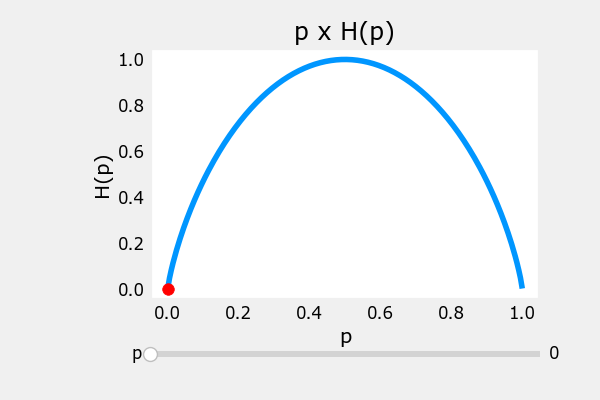

In [43]:
_ = plot_entropy()

|                                                     |   Ear Shape | Face Shape | Whiskers |   Cat  |
|:---------------------------------------------------:|:---------:|:-----------:|:---------:|:------:|
| <img src="../helpers/images/animal/0.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="../helpers/images/animal/1.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Present  |    1   |
| <img src="../helpers/images/animal/2.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |
| <img src="../helpers/images/animal/3.png" alt="drawing" width="50"/> |   Pointy   |  Not Round  |  Present  |    0   |
| <img src="../helpers/images/animal/4.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="../helpers/images/animal/5.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Absent   |    1   |
| <img src="../helpers/images/animal/6.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Absent   |    0   |
| <img src="../helpers/images/animal/7.png" alt="drawing" width="50"/> |   Pointy   |  Round      |  Absent   |    1   |
| <img src="../helpers/images/animal/8.png" alt="drawing" width="50"/> |    Floppy  |   Round     |  Absent   |    0   |
| <img src="../helpers/images/animal/9.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |


We will use **one-hot encoding** to encode the categorical features. They will be as follows:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
            - Ear Shape (1 if pointy, 0 otherwise)
            - Face Shape (1 if round, 0 otherwise)
            - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
            - 1 if the animal is a cat
            - 0 otherwise

In [44]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [45]:
#For instance, the first example
X_train[0]

array([1, 1, 1])

This means that the first example has a pointy ear shape, round face shape and it has whiskers.

## Split based on Information Gain

So, the root node has every animal in our dataset. Remember that $p_1^{node}$ is the proportion of positive class (cats) in the root node. So

$$p_1^{node} = \frac{5}{10} = 0.5$$

Now let's write a function to compute the entropy.

In [46]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)

To illustrate, let's compute the information gain if we split the node for each of the features. To do this, let's write some functions.

In [47]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have 
    that feature = 1 and the right node those that have the feature = 0 
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

So, if we choose Ear Shape to split, then we must have in the left node (check the table above) the indices:

$$0 \quad 3 \quad 4 \quad 5 \quad 7$$

and the right indices, the remaining ones.

In [48]:
# Splitting on index feature = 0 => ear shape
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

### Weighted Entropy

- $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
- $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

Note the difference between these two definitions!! To illustrate, if we split the root node on the feature of index 0 (Ear Shape), then in the left node, the one that has the animals 0, 3, 4, 5 and 7, we have:

$$w^{\text{left}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{left}} = \frac{4}{5}$$
$$w^{\text{right}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{right}} = \frac{1}{5}$$

In [49]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [50]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

np.float64(0.7219280948873623)

So, the weighted entropy in the 2 split nodes is 0.72. To compute the **Information Gain** we must subtract it from the entropy in the node we chose to split (in this case, the root node). 

In [51]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [52]:
information_gain(X_train, y_train, left_indices, right_indices)

np.float64(0.2780719051126377)

Now, let's compute the information gain if we split the root node for each feature:

In [53]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


In [54]:
def get_best_split(X, y):   
    num_features = X.shape[1]
    
    best_feature = -1

    max_info_gain = 0
    for feature in range(num_features):
        left_indices, right_indices = split_indices(X_train, feature)
        info_gain = information_gain(X_train, y_train, left_indices, right_indices)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature
        
    return best_feature

In [55]:
best_feature = get_best_split(X_train, y_train)
print(f"The best feature to split the root node is: {best_feature}\n(0: Ear Shape, 1: Face Shape, 2: Whiskers)")

The best feature to split the root node is: 0
(0: Ear Shape, 1: Face Shape, 2: Whiskers)
